In [1]:
import pandas
import numpy
import scipy
from scipy import stats
import sympy
import matplotlib.pyplot as plot

sympy.init_printing() 

# Mineral Pump

In [2]:
mineral_rpm = pandas.read_excel("Pump Calibration.xlsx", sheet_name = 1, usecols = ["Rpm", "Volume/Time (ml/s)"], nrows = 10)
mineral_rpm

,Rpm,Volume/Time (ml/s)
0,200,0.073631
1,200,0.076142
2,150,0.056608
3,150,0.056415
4,100,0.037311
5,100,0.037363
6,60,0.022495
7,60,0.022509
8,40,0.015008
9,40,0.014987


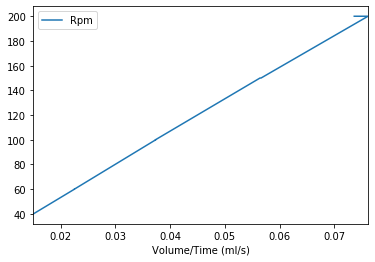

In [3]:
mineral_rpm.plot(y = "Rpm", x = "Volume/Time (ml/s)")

In [4]:
mineral_ma = pandas.read_excel("Pump Calibration.xlsx", sheet_name = 0, usecols = ["Signal Output (mA)", "200", "100"], nrows = 31)
mineral_ma["Signal Output (mA)"]/=1000
mineral_ma

,Signal Output (mA),200,100
0,0.0040,0.0000,0.000
1,0.0045,0.0285,0.028
2,0.0051,0.0625,0.062
3,0.0056,0.0965,0.096
4,0.0062,0.1305,0.130
5,0.0067,0.1645,0.164
6,0.0073,0.1985,0.198
7,0.0078,0.2325,0.232
8,0.0083,0.2660,0.266
9,0.0089,0.3000,0.300


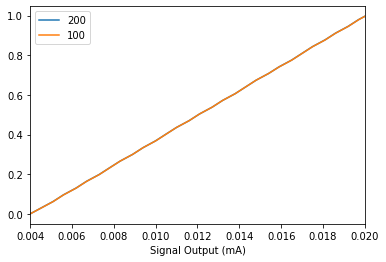

In [5]:
mineral_ma.plot(x = "Signal Output (mA)")

We want to be able to go from Volumetric flow to mA output in Labview

In relation 1:  
x = Volume/Time (ml/s)  
y = Rpm  

In relation 2:  
x = fraction max* max  
y = Signal Output (mA)

In [6]:
mineral_r1 = (numpy.polyfit(mineral_rpm["Volume/Time (ml/s)"], mineral_rpm["Rpm"], 1))
print(mineral_r1)

[2.66402486e+03 1.16924761e-01]


In [7]:
max_rpm = 100
mineral_r2_100 = (numpy.polyfit(mineral_ma["100"], mineral_ma["Signal Output (mA)"], 1))
print(mineral_r2_100)

[0.01597215 0.00407969]


In [8]:
max_rpm = 200
mineral_r2_200 = (numpy.polyfit(mineral_ma["200"], mineral_ma["Signal Output (mA)"], 1))
print(mineral_r2_200)

[0.01597077 0.00407575]


In [9]:
concat_mineral_ma = pandas.concat([mineral_ma["100"],mineral_ma["200"]])
concat_mineral_ma = pandas.concat([concat_mineral_ma,pandas.concat([mineral_ma["Signal Output (mA)"],mineral_ma["Signal Output (mA)"]])], axis=1)

In [10]:
concat_mineral_ma.columns=["Fraction of Max", "Signal Output (mA)"]

In [11]:
mineral_r2_concat = (numpy.polyfit(concat_mineral_ma["Fraction of Max"], concat_mineral_ma["Signal Output (mA)"], 1))
print(mineral_r2_concat)

[0.01597146 0.00407773]


In [12]:
print("Relation 1: Desired Flowrate to Rpm: \n%s x + %s\n" %(mineral_r1[0],mineral_r1[1]))
print("Relation 2: Desried Rpm to mA output: \n%s x/max_rpm + %s" %(mineral_r2_concat[0],mineral_r2_concat[1]))

Relation 1: Desired Flowrate to Rpm: 
2664.0248599389456 x + 0.11692476092388554

Relation 2: Desried Rpm to mA output: 
0.015971458705790826 x/max_rpm + 0.004077725380344


Sub Relation 1 as x for relation 2

In [13]:
Rpm, mA, mlpers, mlperm, maxrpm = sympy.symbols(("Rpm", "mA", "ml/s", "ml/m", "MaxRpm"))
Rpm, mA, mlpers, mlperm, maxrpm

In [14]:
Eq1 = mineral_r1[0]*mlpers + mineral_r1[1]
Eq1

In [15]:
0.146377836179532*0.0159714587057908

In [16]:
Eq2 = mA = (mineral_r2_concat[0]*Rpm/maxrpm + mineral_r2_concat[1])
Eq2

In [17]:
Eq3 = Eq2.subs(Rpm, Eq1)
Eq3

In [18]:
Eq3.subs(maxrpm,200)

In [19]:
Amps = 0.212741815208575*mineral_rpm["Volume/Time (ml/s)"]+0.0040870626752979
Amps

0    0.019751
1    0.020286
2    0.016130
3    0.016089
4    0.012025
5    0.012036
6    0.008873
7    0.008876
8    0.007280
9    0.007275
Name: Volume/Time (ml/s), dtype: float64

In [20]:
Eq3